                                                    Bank Marketing Report

# Data Preprocessing

# Importing Libraries
Importing the useful libraries which is require for analysis of data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing Data using Pandas

In [3]:
dataset=pd.read_csv("C:/Users/gagan/Desktop/bank_dataset/bank.csv", header='infer',sep=';') #Reading the dataset

In [4]:
dataset.head()#Checking the Top head of Dataset

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


# Taking Care of Missing values

In [5]:
dataset.info()#Checking the missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null object
balance      4521 non-null int64
housing      4521 non-null object
loan         4521 non-null object
contact      4521 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null object
y            4521 non-null object
dtypes: int64(7), object(10)
memory usage: 600.5+ KB


Droping the Top non Important Varaibles from the Dataset

In [6]:
dataset = dataset.drop(['day','poutcome'],axis=1)

In [7]:
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,oct,79,1,-1,0,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,may,220,1,339,4,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,apr,185,1,330,1,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,jun,199,4,-1,0,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,may,226,1,-1,0,no


# Encoding a Categorical data 
Categorical Data is encoded so that it can be fit into model while training as machine learning model accept
the numerical values or it does numerical computation

In [8]:
#Encoding a categorical data
def encodingdata(dataset):
    dataset.default.replace(('yes','no'),(1,0),inplace=True)
    dataset.housing.replace(('yes','no'),(1,0),inplace=True)
    dataset.loan.replace(('yes','no'),(1,0),inplace=True)
    dataset.contact.replace(('telephone','cellular','unknown'),(1,2,3),inplace=True)
    dataset.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12),inplace=True)
    dataset.y.replace(('yes', 'no'), (1, 0), inplace=True)
    return dataset
dataset = encodingdata(dataset)
    

In [13]:
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,y
0,30,unemployed,married,primary,0,1787,0,0,2,10,79,1,-1,0,0
1,33,services,married,secondary,0,4789,1,1,2,5,220,1,339,4,0
2,35,management,single,tertiary,0,1350,1,0,2,4,185,1,330,1,0
3,30,management,married,tertiary,0,1476,1,1,3,6,199,4,-1,0,0
4,59,blue-collar,married,secondary,0,0,1,0,3,5,226,1,-1,0,0


# Histogram Plots
All the Histogram below suggest that data is skewed towards left i.e. existence of skewness brings us to a point that we need to sample the data efficiently while classifiying the train_data and test_data

In [14]:
plt.hist((data.duration),bins=100)
plt.show()

NameError: name 'data' is not defined

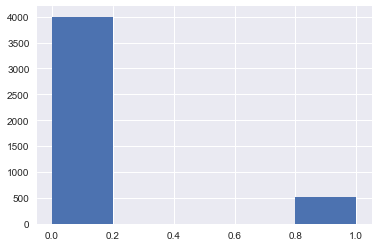

In [15]:
plt.hist((dataset.y),bins=5)
plt.show()

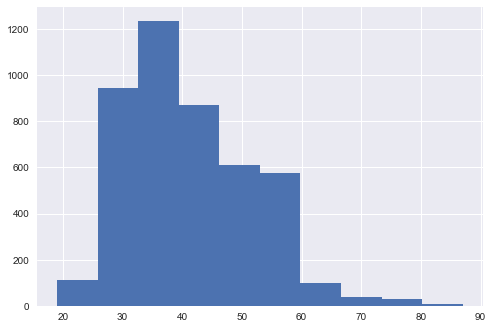

In [94]:
plt.hist(data.age,bins=10)
plt.show()

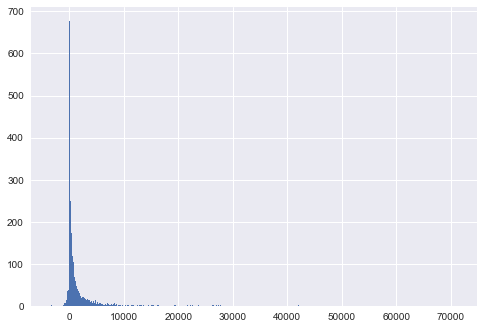

In [74]:
plt.hist(data.balance,bins=1000)
plt.show()

In [ ]:
plt.hist(data.,bins=10)
plt.show()

# Outliers Checking

Data > (Q3 * 1.5) is said to be outlier where Q3 is 75% Quantile

Checking the outliers at 75% so anything greater than 75% value will be a Outliers.As you can clearly see from boxplots below

In [16]:
#Outliers 
#Data > (Q3 * 1.5) is said to be outlier 
#Checking the Outliers at 75% Quantile
data=dataset

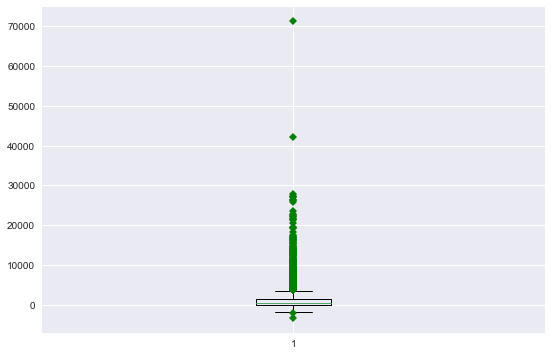

In [17]:
fig = plt.figure(1, figsize=(9, 6))
ax2 = fig.add_subplot(111)
bp2 = ax2.boxplot(data.balance,0,'gD')
plt.show()

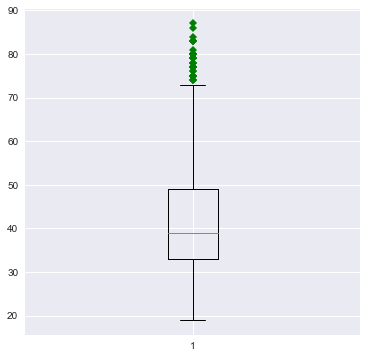

In [18]:
fig = plt.figure(1, figsize=(6, 6))
ax = fig.add_subplot(111)
bp = ax.boxplot(data.age,0,'gD')
plt.show()

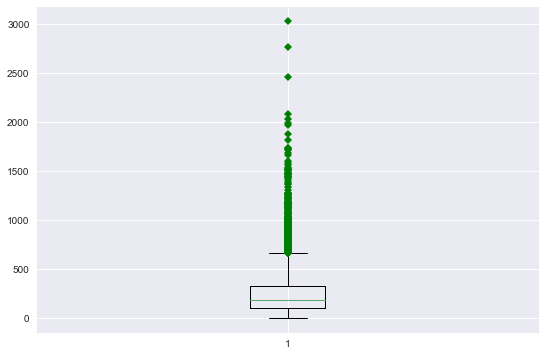

In [19]:
fig = plt.figure(1, figsize=(9, 6))
ax2 = fig.add_subplot(111)
bp2 = ax2.boxplot(data.duration,0,'gD')
plt.show()

As we can see from the above boxplots that most of the data points 
are lying bove the 3rd quantile by multiplication factor of 1.5
So these data points are outlier for most of the data points.

# Checking the nature of the bar graph

In this we are checking the Relationship of response variable with other variable which tells that how much people go for 
term deposits 

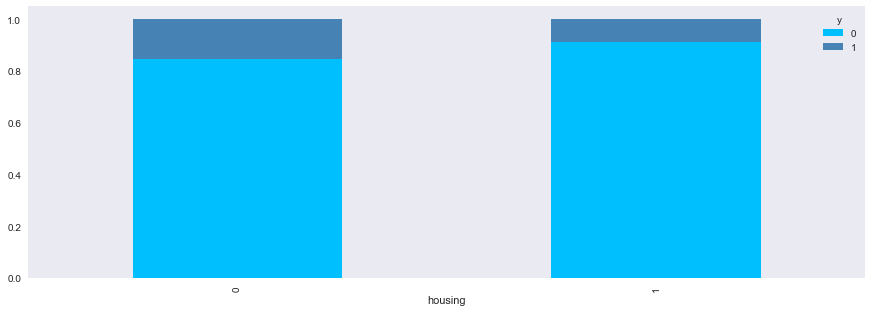

In [20]:
draw_data = pd.crosstab(data.housing, data.y)
draw_data.div(draw_data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['deepskyblue','steelblue'],grid=False, figsize=(15, 5))
plt.show()

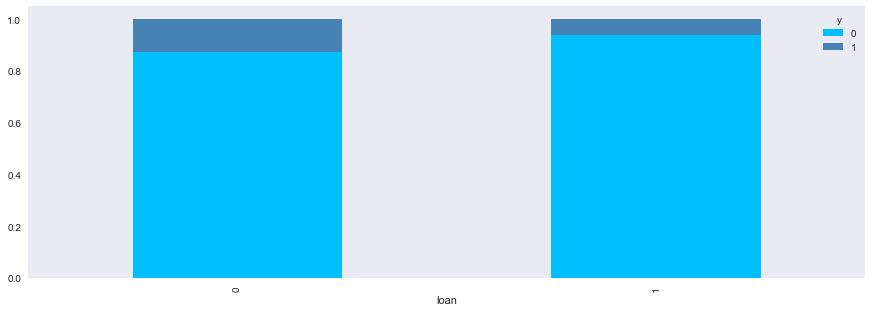

In [21]:
draw_data = pd.crosstab(data.loan, data.y)
draw_data.div(draw_data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['deepskyblue','steelblue'],grid=False, figsize=(15, 5))
plt.show()

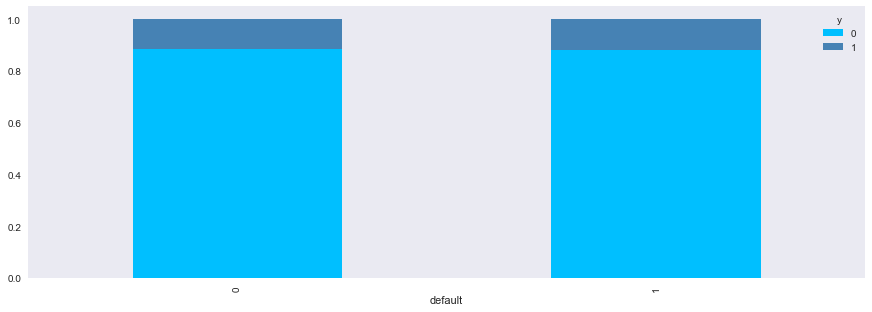

In [22]:
draw_data = pd.crosstab(data.default, data.y)
draw_data.div(draw_data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['deepskyblue','steelblue'],grid=False, figsize=(15, 5))
plt.show()

# Feature Engineering

By looking at the bar graph, we can observe that Feature vs Label the data is wide spread i.e. we cannot predict completely based on feature alone. Feature Engineering.

In [23]:
#Feature Engineering
def age_(data):
    
    data['Adult'] = 0
    data['Middle_Aged'] = 0
    data['old'] = 0    
    data.loc[(data['age'] <= 35) & (data['age'] >= 18),'Adult'] = 1
    data.loc[(data['age'] <= 60) & (data['age'] >= 36),'Middle_Aged'] = 1
    data.loc[data['age'] >=61,'old'] = 1
    
    return data

def campaign_(data):
    
    
    data.loc[data['campaign'] == 1,'campaign'] = 1
    data.loc[(data['campaign'] >= 2) & (data['campaign'] <= 3),'campaign'] = 2
    data.loc[data['campaign'] >= 4,'campaign'] = 3
    
    return data

def duration_(data):
    
    data['t_min'] = 0
    data['t_e_min'] = 0
    data['e_min']=0
    data.loc[data['duration'] <= 5,'t_min'] = 1
    data.loc[(data['duration'] > 5) & (data['duration'] <= 10),'t_e_min'] = 1
    data.loc[data['duration'] > 10,'e_min'] = 1
    
    return data

def pdays_(data):
    data['pdays_not_contacted'] = 0
    data['months_passed'] = 0
    data.loc[data['pdays'] == -1 ,'pdays_not_contacted'] = 1
    data['months_passed'] = data['pdays']/30
    data.loc[(data['months_passed'] >= 0) & (data['months_passed'] <=2) ,'months_passed'] = 1
    data.loc[(data['months_passed'] > 2) & (data['months_passed'] <=6),'months_passed'] = 2
    data.loc[data['months_passed'] > 6 ,'months_passed'] = 3
    
    return data

def previous_(data):
    
    data['Not_Contacted'] = 0
    data['Contacted'] = 0
    data.loc[data['previous'] == 0 ,'Not_Contacted'] = 1
    data.loc[(data['previous'] >= 1) & (data['pdays'] <=99) ,'Contacted'] = 1
    data.loc[data['previous'] >= 100,'Contacted'] = 2
    
    return data

def balance_(data):
    data['Neg_Balance'] = 0
    data['No_Balance'] = 0
    data['Pos_Balance'] = 0
    
    data.loc[~data['balance']<0,'Neg_Balance'] = 1
    data.loc[data['balance'] == 0,'No_Balance'] = 1
    data.loc[(data['balance'] >= 1) & (data['balance'] <= 100),'Pos_Balance'] = 1
    data.loc[(data['balance'] >= 101) & (data['balance'] <= 500),'Pos_Balance'] = 2
    data.loc[(data['balance'] >= 501) & (data['balance'] <= 2000),'Pos_Balance'] = 3
    data.loc[(data['balance'] >= 2001) & (data['balance'] <= 10000),'Pos_Balance'] = 4
    data.loc[data['balance'] >= 10001,'Pos_Balance'] = 5
    
    return data

def job_(data):
    
    data.loc[data['job'] == "management",'job'] = 1
    data.loc[data['job'] == "technician",'job'] = 2
    data.loc[data['job'] == "entrepreneur",'job'] = 3
    data.loc[data['job'] == "blue-collar",'job'] = 4
    data.loc[data['job'] == "retired",'job'] = 5
    data.loc[data['job'] == "admin.",'job'] = 6
    data.loc[data['job'] == "services",'job'] = 7
    data.loc[data['job'] == "self-employed",'job'] = 8
    data.loc[data['job'] == "unemployed",'job'] = 9
    data.loc[data['job'] == "student",'job'] = 10
    data.loc[data['job'] == "housemaid",'job'] = 11
    data.loc[data['job'] == "unknown",'job'] = 12
    
    return data

def marital_(data):
    
    data['married'] = 0
    data['singles'] = 0
    data['divorced'] = 0
    data.loc[data['marital'] == 'married','married'] = 1
    data.loc[data['marital'] == 'singles','singles'] = 1
    data.loc[data['marital'] == 'divorced','divorced'] = 1
    
    return data

def education_(data):
    
    data['primary'] = 0
    data['secondary'] = 0
    data['tertiary'] = 0
    data['unknown'] = 0
    data.loc[data['education'] == 'primary','primary'] = 1
    data.loc[data['education'] == 'secondary','secondary'] = 1
    data.loc[data['education'] == 'tertiary','tertiary'] = 1
    data.loc[data['education'] == 'unknown','unknown'] = 1    
    
    return data


In [24]:
data = campaign_(data)
data = age_(data)
data = education_(data)
data = balance_(data)
data = job_(data)
data = previous_(data)
data = duration_(data)
data = pdays_(data)
data = marital_(data)

In [25]:
print(data.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'y', 'Adult', 'Middle_Aged', 'old', 'primary', 'secondary', 'tertiary',
       'unknown', 'Neg_Balance', 'No_Balance', 'Pos_Balance', 'Not_Contacted',
       'Contacted', 't_min', 't_e_min', 'e_min', 'pdays_not_contacted',
       'months_passed', 'married', 'singles', 'divorced'],
      dtype='object')


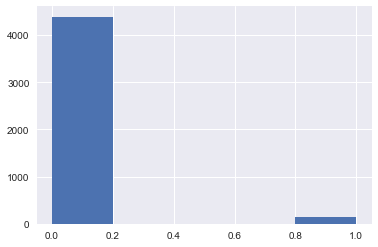

In [27]:
plt.hist(data.Contacted,bins=5)
plt.show()

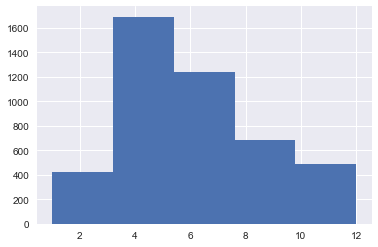

In [28]:
plt.hist(data.month,bins=5)
plt.show()

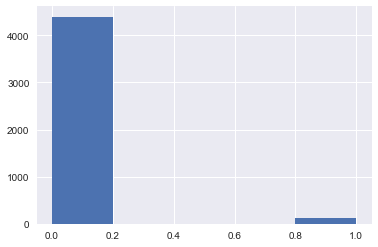

In [29]:
plt.hist(data.old,bins=5)
plt.show()

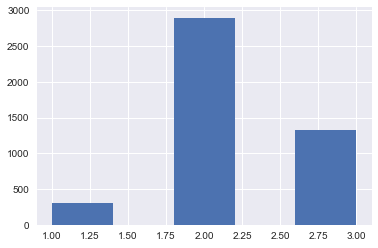

In [30]:
plt.hist(data.contact,bins=5)
plt.show()

In [115]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,month,...,Not_Contacted,Contacted,t_min,t_e_min,e_min,pdays_not_contacted,months_passed,married,singles,divorced
0,30,9,married,primary,0,1787,0,0,2,10,...,1,0,0,0,1,1,-0.033333,1,0,0
1,33,7,married,secondary,0,4789,1,1,2,5,...,0,0,0,0,1,0,3.000000,1,0,0
2,35,1,single,tertiary,0,1350,1,0,2,4,...,0,0,0,0,1,0,3.000000,0,0,0
3,30,1,married,tertiary,0,1476,1,1,3,6,...,1,0,0,0,1,1,-0.033333,1,0,0
4,59,4,married,secondary,0,0,1,0,3,5,...,1,0,0,0,1,1,-0.033333,1,0,0


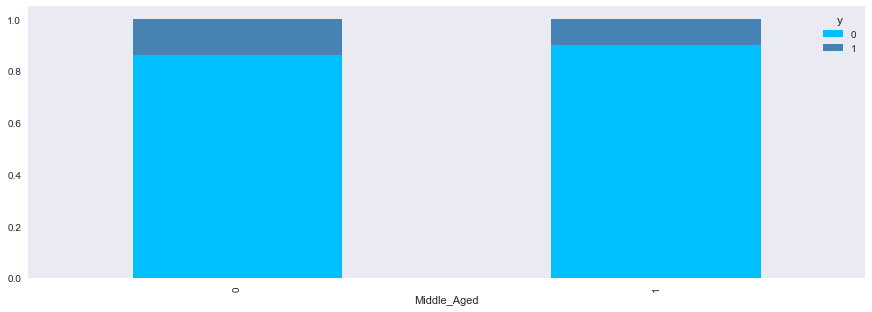

In [116]:
draw_data = pd.crosstab(data.Middle_Aged, data.y)
draw_data.div(draw_data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['deepskyblue','steelblue'],grid=False, figsize=(15, 5))
plt.show()

# Correlation Checking
In this we are Checking the correlation among different variables and removing one of the variables having 80% or above 
correlation

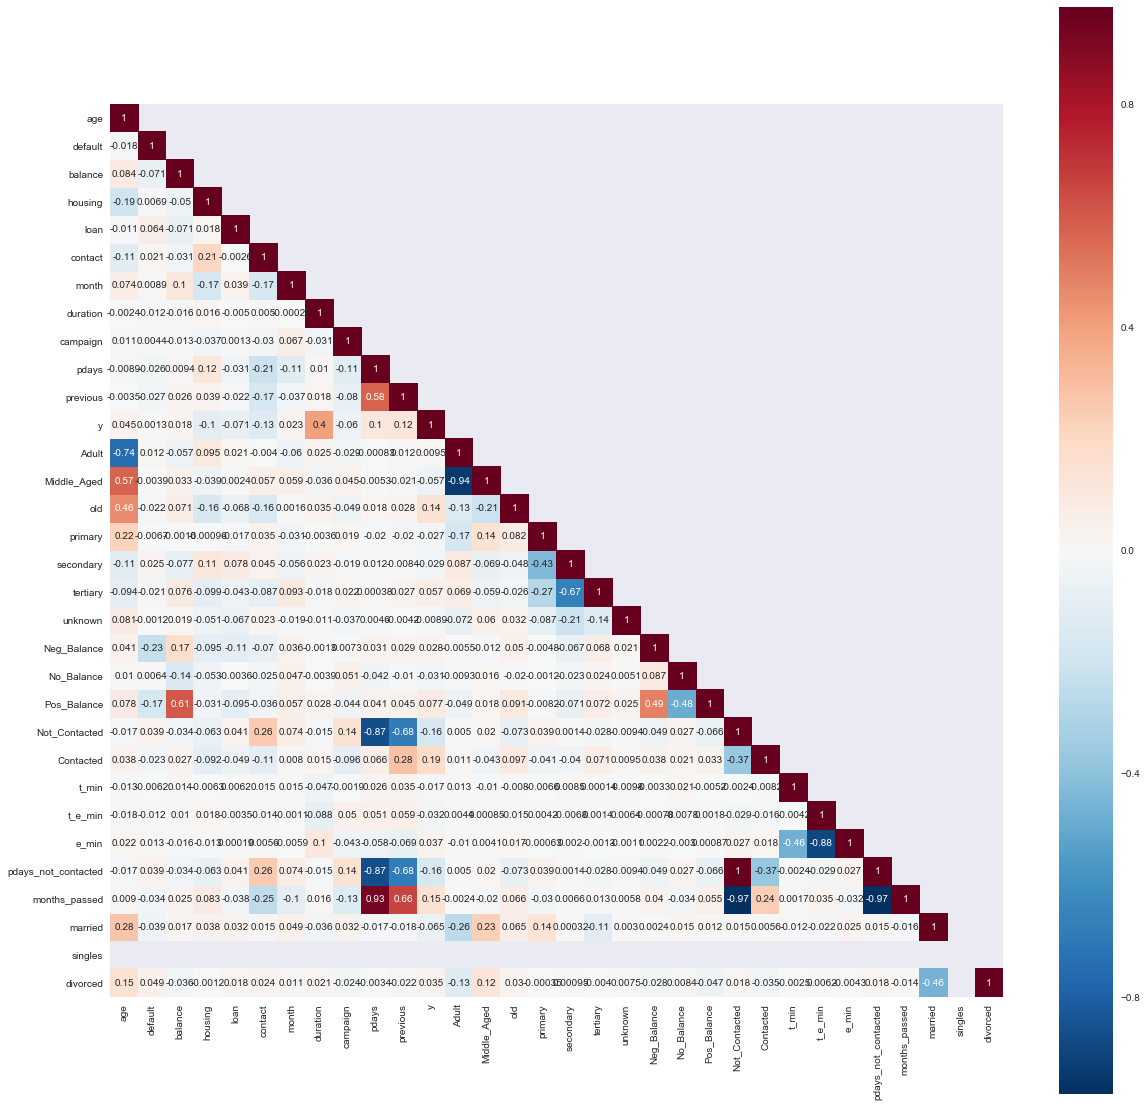

In [31]:
corrMatt = data.corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots()
fig.set_size_inches(20,20)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

In [129]:
data.dtypes

age                      int64
job                     object
marital                 object
education               object
default                  int64
balance                  int64
housing                  int64
loan                     int64
contact                  int64
month                    int64
duration                 int64
campaign                 int64
pdays                    int64
previous                 int64
y                        int64
Adult                    int64
Middle_Aged              int64
old                      int64
primary                  int64
secondary                int64
tertiary                 int64
unknown                  int64
Neg_Balance              int64
No_Balance               int64
Pos_Balance              int64
Not_Contacted            int64
Contacted                int64
t_min                    int64
t_e_min                  int64
e_min                    int64
pdays_not_contacted      int64
months_passed          float64
married 

# Taking out most important features

In this we are taking out most important features using decision tree classifier

Feature ranking:
1. feature 18 (0.281445)
2. feature 5 (0.236844)
3. feature 9 (0.158231)
4. feature 4 (0.090257)
5. feature 17 (0.059506)
6. feature 0 (0.033980)
7. feature 2 (0.023720)
8. feature 23 (0.023496)
9. feature 26 (0.022970)
10. feature 13 (0.021620)
11. feature 12 (0.020157)
12. feature 15 (0.016530)
13. feature 22 (0.011245)
14. feature 7 (0.000000)
15. feature 1 (0.000000)
16. feature 24 (0.000000)
17. feature 3 (0.000000)
18. feature 21 (0.000000)
19. feature 6 (0.000000)
20. feature 19 (0.000000)
21. feature 16 (0.000000)
22. feature 20 (0.000000)
23. feature 10 (0.000000)
24. feature 11 (0.000000)
25. feature 25 (0.000000)
26. feature 14 (0.000000)
27. feature 8 (0.000000)


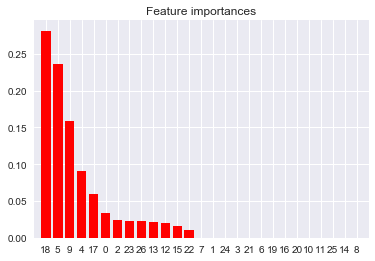

In [130]:
#Feature Importance
from sklearn import tree

y = data.y.values
X = data.drop(['y','balance','previous','pdays','age','duration','education','marital'],axis=1)
# Build a forest and compute the feature importances

clf = tree.DecisionTreeClassifier(max_depth=5)
clf.fit(X,y)
importances = clf.feature_importances_

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [131]:
X.columns

Index(['job', 'default', 'housing', 'loan', 'contact', 'month', 'campaign',
       'Adult', 'Middle_Aged', 'old', 'primary', 'secondary', 'tertiary',
       'unknown', 'Neg_Balance', 'No_Balance', 'Pos_Balance', 'Not_Contacted',
       'Contacted', 't_min', 't_e_min', 'e_min', 'pdays_not_contacted',
       'months_passed', 'married', 'singles', 'divorced'],
      dtype='object')

In [132]:
imp_cols=['Contacted','month','old','contact','Not_Contacted','job','housing','tertiary','months_passed','divorced','unknown','pdays_not_contacted','No_Balance']
X = data[imp_cols]
y=data.y


As you can see from the above graph that Most Important Features are 


# Report mean, average, median, variance values

In [133]:
X.median()

Contacted              0.000000
month                  6.000000
old                    0.000000
contact                2.000000
Not_Contacted          1.000000
job                    4.000000
housing                1.000000
tertiary               0.000000
months_passed         -0.033333
divorced               0.000000
unknown                0.000000
pdays_not_contacted    1.000000
No_Balance             0.000000
dtype: float64

In [54]:
X.var()

Contacted              0.028767
month                  5.656692
old                    0.027308
contact                0.308300
Not_Contacted          0.147947
job                    7.696893
housing                0.245695
tertiary               0.209487
months_passed          1.056117
divorced               0.103172
unknown                0.039660
pdays_not_contacted    0.147947
No_Balance             0.072745
dtype: float64

In [55]:
X.mean()

Contacted              0.029639
month                  6.166777
old                    0.028091
contact                2.226277
Not_Contacted          0.819509
job                    4.174740
housing                0.566025
tertiary               0.298607
months_passed          0.436518
divorced               0.116788
unknown                0.041363
pdays_not_contacted    0.819509
No_Balance             0.078965
dtype: float64

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Applying PCA
from sklearn.decomposition import PCA
pca=PCA(n_components=None)
pca.fit_transform(X_train)
pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[  2.48033487e-01   1.17516401e-01   1.10188205e-01   7.84834091e-02
   7.78290736e-02   7.38273998e-02   7.20403509e-02   6.57105454e-02
   5.80078607e-02   5.14303115e-02   4.53065343e-02   1.62642136e-03
   2.72180840e-34]


# Training and Testing 


# Appling multivariate regression or classification 

Here we are using three algorithms
1.Logistic Regression
2.Support Vector Machine
3.Random Forest

As in this data we have to predict a binary value which means our response variable is 0/1 variable 
so we will use a these tree algorithms which is best suitable to predict the result.

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
# Feature Scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

for i in range(1, 13):
    print("No. of Components", i)
    # Applying PCA
    pca=PCA(n_components=i)
    x_train = pca.fit_transform(X_train)
    x_test = pca.transform(X_test)
    explained_variance = pca.explained_variance_ratio_
    print("CoVariance:", sum(explained_variance)*100)

    regressor = LogisticRegression()
    regressor.fit(x_train, y_train)
    print("Logistic Regressor Accuracy Score:", regressor.score(x_test, y_test)*100)

    regressor = ensemble.RandomForestClassifier(n_estimators=100)
    regressor.fit(x_train, y_train)
    print("Random Forest Accuracy Score:", regressor.score(x_test, y_test)*100)

    regressor = SVC(kernel='linear',random_state=0)
    regressor.fit(x_train, y_train)
    print("SVC Accuracy Score:", regressor.score(x_test, y_test)*100)

No. of Components 1
CoVariance: 24.8033486847
Logistic Regressor Accuracy Score: 87.7984084881
Random Forest Accuracy Score: 85.6763925729
SVC Accuracy Score: 87.7984084881
No. of Components 2
CoVariance: 36.5549887933
Logistic Regressor Accuracy Score: 87.7099911583
Random Forest Accuracy Score: 86.2953138815
SVC Accuracy Score: 87.7984084881
No. of Components 3
CoVariance: 47.573809333
Logistic Regressor Accuracy Score: 87.7984084881
Random Forest Accuracy Score: 86.2953138815
SVC Accuracy Score: 87.7984084881
No. of Components 4
CoVariance: 55.4221502465
Logistic Regressor Accuracy Score: 87.9752431477
Random Forest Accuracy Score: 86.5605658709
SVC Accuracy Score: 87.7984084881
No. of Components 5
CoVariance: 63.2050576108
Logistic Regressor Accuracy Score: 87.9752431477
Random Forest Accuracy Score: 86.6489832007
SVC Accuracy Score: 87.7984084881
No. of Components 6
CoVariance: 70.5877975907
Logistic Regressor Accuracy Score: 87.8868258179
Random Forest Accuracy Score: 86.56056587

Above we are Applying Principal Component analysis to adjust model complexity of your prediction algorithm.Repeating the experiment with different covariance matrices and report differences in your results with your test set.

Logistic Regressor Accuracy Score: 87.4447391689
Random Forest Accuracy Score: 86.2068965517
SVC Accuracy Score: 87.7984084881
